In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
#sns.set(rc={'figure.figsize': (13,7)})
#sns.set_style('whitegrid')  # dark, white, ticks, whitegrid

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") #seaborn, ggplot, fivethirtyeight
plt.rcParams['figure.figsize'] = (13, 8)

import missingno as msn

In [2]:
df = pd.read_csv(r"C:\Users\JASIM\Documents\Coding\DataSet\consumer_complaints.csv")

# Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 777959 non-null  object
 1   product                       777959 non-null  object
 2   sub_product                   542822 non-null  object
 3   issue                         777959 non-null  object
 4   sub_issue                     320986 non-null  object
 5   consumer_complaint_narrative  157865 non-null  object
 6   company_public_response       197884 non-null  object
 7   company                       777959 non-null  object
 8   state                         772056 non-null  object
 9   zip_code                      772001 non-null  object
 10  tags                          109264 non-null  object
 11  consumer_consent_provided     288311 non-null  object
 12  submitted_via                 777959 non-null  object
 13 

In [4]:
df.shape

(777959, 18)

# Data Cleaning and preparing

#### We will remove some columns 

In [5]:
#df['tags'].head(20)
#df['consumer_complaint_narrative'].head(20)
#df['company_public_response'].head(20)
for i in df.company_public_response:
    print(i)

Company has responded to the consumer and the CFPB and chooses not to provide a public response
nan
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company believes it acted appropriately as authorized by contract or law
Company has responded to the consumer and the CFPB and chooses not to provide a public response
nan
nan
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company believes it acted appropriately as authorized by contract or law
nan
nan
Company has responded to the consumer and the CFPB and chooses not to provide a public response
nan
nan
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company has responded to the consumer and the CFPB and cho

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [7]:
df.drop(columns= [#'date_received', 'product', 'sub_product', 'issue', 
    'sub_issue','consumer_complaint_narrative', 'company_public_response', 
    #'company','state', 'zip_code', 
    'tags', 'consumer_consent_provided'
       #'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       #'timely_response', 'consumer_disputed', 'complaint_id'
], inplace=True)


In [8]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'company', 'state',
       'zip_code', 'submitted_via', 'date_sent_to_company',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed',
       'complaint_id'],
      dtype='object')

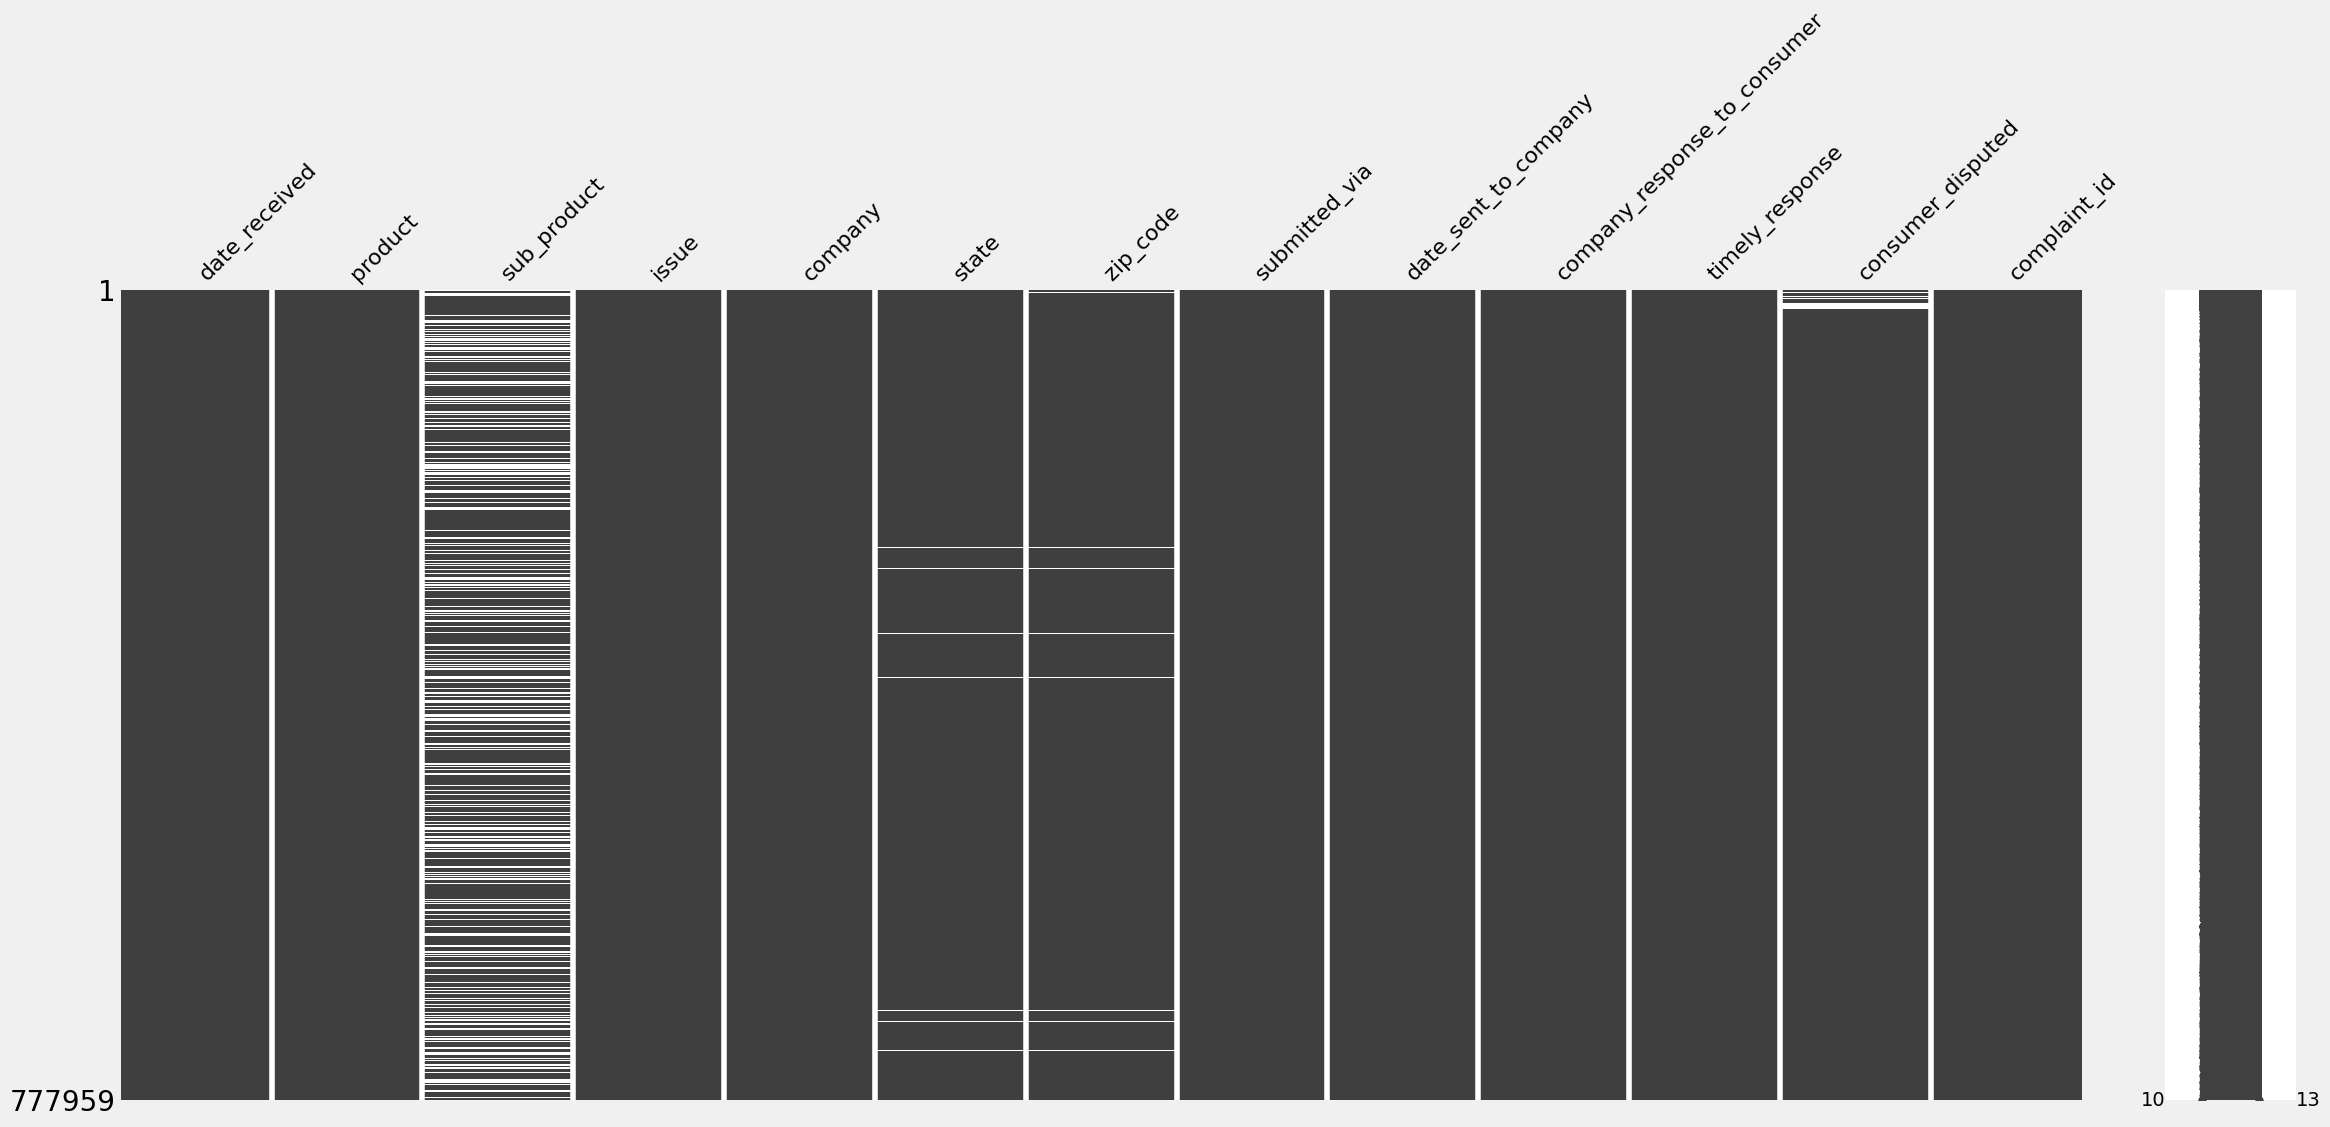

In [9]:
msn.matrix(df)
plt.show()

In [10]:
#df.isnull().sum()/ len(df)*100

In [11]:

df.fillna({'sub_product': 'Not given', \
           'consumer_disputed': 'Not given'}, inplace=True)


In [12]:
df.isnull().sum()/ len(df)*100

date_received                   0.00000
product                         0.00000
sub_product                     0.00000
issue                           0.00000
company                         0.00000
state                           0.75878
zip_code                        0.76585
submitted_via                   0.00000
date_sent_to_company            0.00000
company_response_to_consumer    0.00000
timely_response                 0.00000
consumer_disputed               0.00000
complaint_id                    0.00000
dtype: float64

In [13]:
df= df.dropna().reset_index(drop=True)

In [14]:
df.columns = df.columns.str.title()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771983 entries, 0 to 771982
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date_Received                 771983 non-null  object
 1   Product                       771983 non-null  object
 2   Sub_Product                   771983 non-null  object
 3   Issue                         771983 non-null  object
 4   Company                       771983 non-null  object
 5   State                         771983 non-null  object
 6   Zip_Code                      771983 non-null  object
 7   Submitted_Via                 771983 non-null  object
 8   Date_Sent_To_Company          771983 non-null  object
 9   Company_Response_To_Consumer  771983 non-null  object
 10  Timely_Response               771983 non-null  bool  
 11  Consumer_Disputed             771983 non-null  object
 12  Complaint_Id                  771983 non-null  int64 
dtyp

In [16]:

# To change dytpes of date columns
df['Date_Sent_To_Company'] = pd.to_datetime(df['Date_Sent_To_Company'])
df['Date_Received'] = pd.to_datetime(df['Date_Received'])


* I fill two columns with not given

* There was some null values in other columns too and i drop them and reset the index

* I also change the first letters in columns to upper case

* And i change the dtypes of date columns to datetime

* so First i clean the data and than i prepare it for vizulization

In [17]:
df.head()

Date_Received           Product                            Sub_Product  \
0    2017-03-21  Credit reporting                              Not given   
1    2017-04-19   Debt collection  Other (i.e. phone, health club, etc.)   
2    2017-04-19       Credit card                              Not given   
3    2017-04-14          Mortgage                         Other mortgage   
4    2017-04-19       Credit card                              Not given   

                                      Issue                        Company  \
0    Incorrect information on credit report           EXPERIAN DELAWARE GP   
1           Disclosure verification of debt  Security Credit Services, LLC   
2                                     Other                 CITIBANK, N.A.   
3  Loan modification,collection,foreclosure       Shellpoint Partners, LLC   
4                      Credit determination                   U.S. BANCORP   

  State Zip_Code Submitted_Via Date_Sent_To_Company  \
0    TX    77075         Phone           2017-03-21   
1    IL    60643           Web           2017-04-20   
2    IL    62025      Referral           2017-04-20   
3    CA    90305      Referral           2017-04-14   
4    LA    70571   Postal mail           2017-04-21   

      Company_Response_To_Consumer  Timely_Response Consumer_Disputed  \
0  Closed with non-monetary relief             True                No   
1          Closed with explanation             True                No   
2          Closed with explanation             True                No   
3          Closed with explanation             True                No   
4          Closed with explanation             True                No   

   Complaint_Id  
0       2397100  
1       2441777  
2       2441830  
3       2436165  
4       2441726

## Complaints Submitted via 

In [18]:
df.groupby('Submitted_Via')['Complaint_Id'].count()

Submitted_Via
Email             301
Fax             10637
Phone           51261
Postal mail     48593
Referral       131677
Web            529514
Name: Complaint_Id, dtype: int64

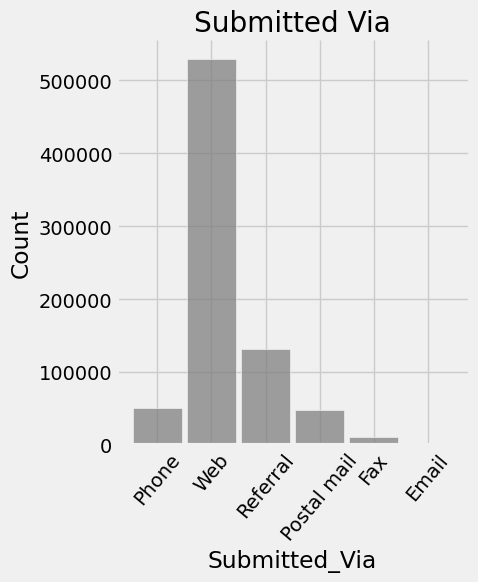

In [19]:
sns.displot(df, x ='Submitted_Via', color = 'grey', 
            #discrete= True
            shrink=.9,)

plt.title('Submitted Via')
plt.xticks(rotation=50)

plt.show()

## The list of companies with High complaints rate

In [20]:
companies_withmore_complaint = df.groupby('Company')['Complaint_Id'].count().sort_values(ascending=False)[:30]

companies_withmore_complaint

Company
BANK OF AMERICA, NATIONAL ASSOCIATION     65621
WELLS FARGO BANK, NATIONAL ASSOCIATION    53473
EQUIFAX, INC.                             48990
EXPERIAN DELAWARE GP                      46723
JPMORGAN CHASE & CO.                      42501
TRANSUNION INTERMEDIATE HOLDINGS, INC.    40595
CITIBANK, N.A.                            34653
OCWEN LOAN SERVICING LLC                  24137
CAPITAL ONE FINANCIAL CORPORATION         20343
Navient Solutions, LLC.                   18257
NATIONSTAR MORTGAGE                       16198
SYNCHRONY BANK                            13057
U.S. BANCORP                              12332
Ditech Financial LLC                      11481
PNC Bank N.A.                              8644
AMERICAN EXPRESS CENTURION BANK            8335
ENCORE CAPITAL GROUP INC.                  7839
HSBC NORTH AMERICA HOLDINGS INC.           7116
DISCOVER BANK                              6464
SUNTRUST BANKS, INC.                       6166
TD BANK US HOLDING COMPANY      

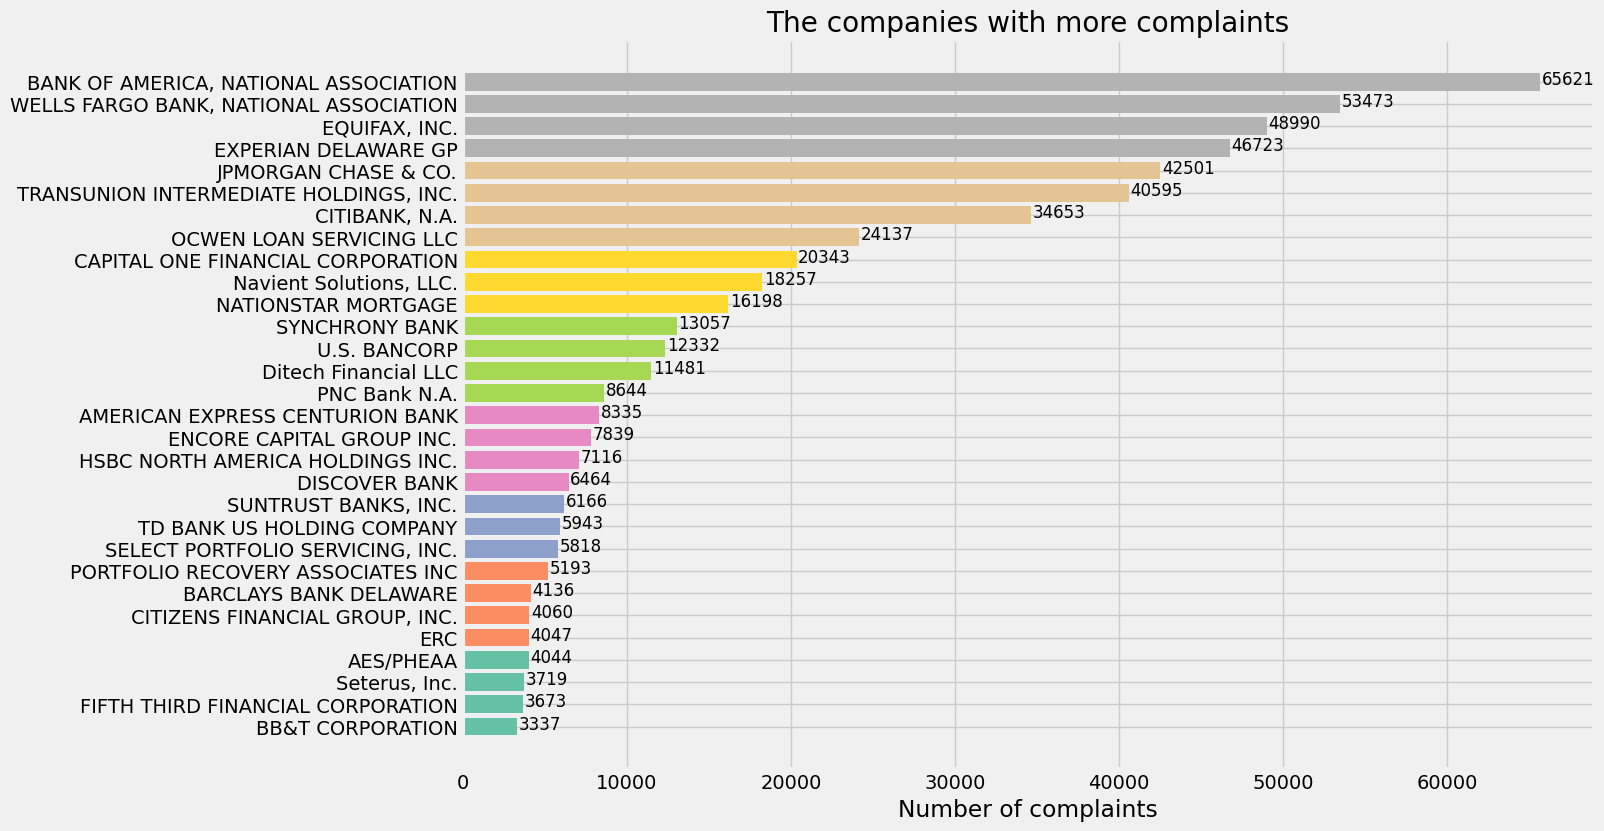

In [21]:
# Sort the companies by the number of complaints
companies_withmore_complaint = companies_withmore_complaint.sort_values()

# Create a color palette
colors = plt.cm.Set2(np.linspace(0, 1, len(companies_withmore_complaint)))

# Create the plot
fig= plt.figure(figsize=(13, 9))
plt.barh(companies_withmore_complaint.index,\
         companies_withmore_complaint.values, color=colors )

# Add x-axis label
plt.xlabel("Number of complaints")

# Add title
plt.title('The companies with more complaints')

# Add annotations
for i, v in enumerate(companies_withmore_complaint.values):
    plt.text(v + 100, i - 0.1, str(v), color='black', fontsize=12)

# Show the plot
plt.show()


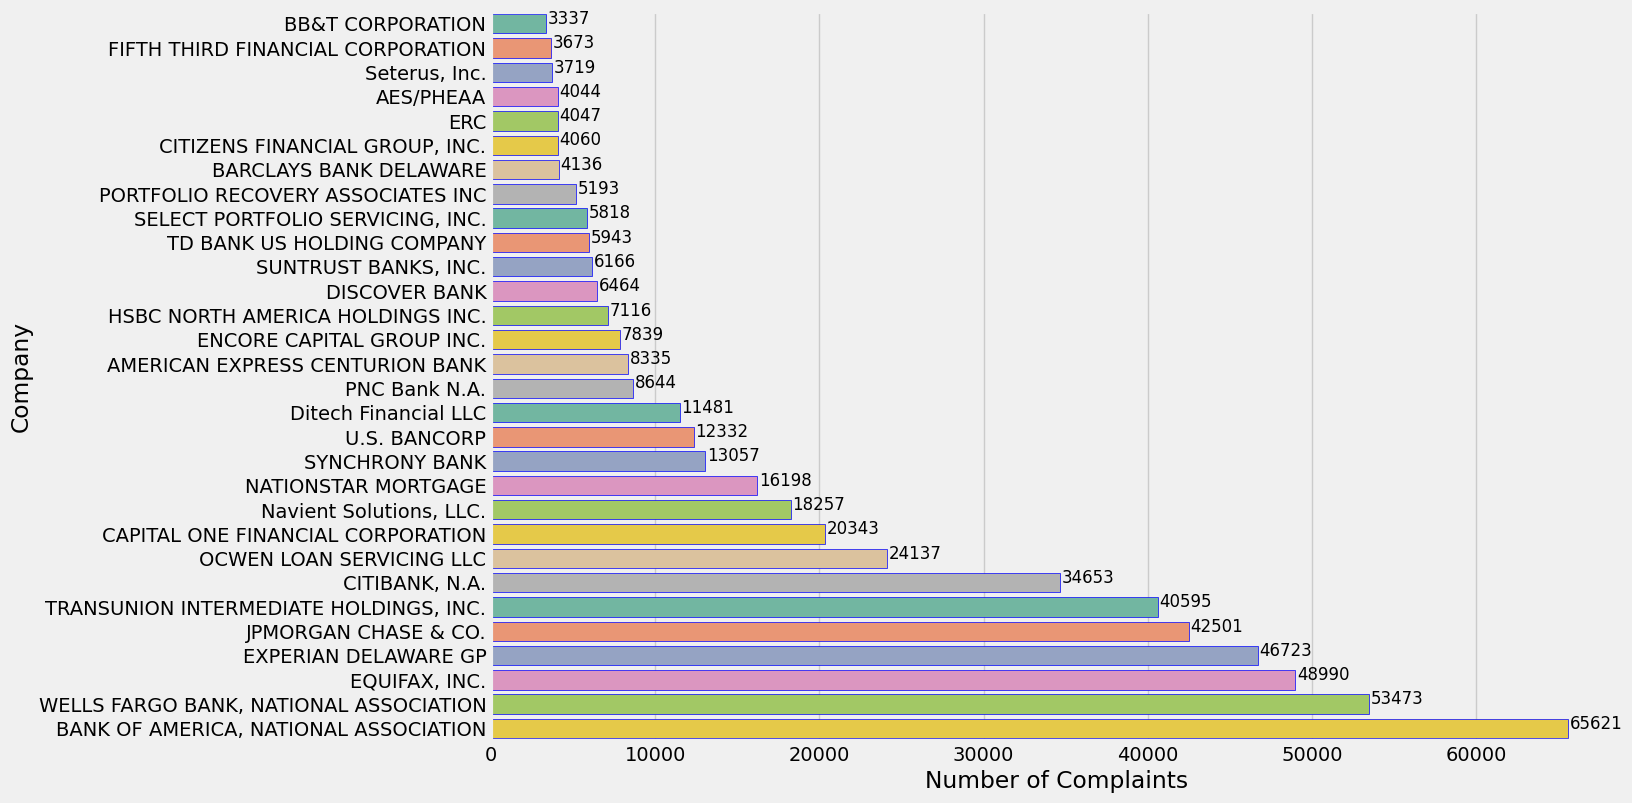

In [22]:
# Sort the companies by the number of complaints
companies_withmore_complaint = companies_withmore_complaint.sort_values()

# Create a color palette
colors = sns.color_palette("Set2", len(companies_withmore_complaint))

# Create the plot
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(x=companies_withmore_complaint.values, y=companies_withmore_complaint.index, 
            palette=colors, edgecolor='b', ax=ax
           )

# Add x-axis label
ax.set_xlabel('Number of Complaints')

# Add title
#ax.set_title('The companies with more complaints')

# Add annotations
for i, v in enumerate(companies_withmore_complaint.values):
    ax.text(v + 100, i, str(v), color='k', fontsize=12)

# Show the plot
plt.show()


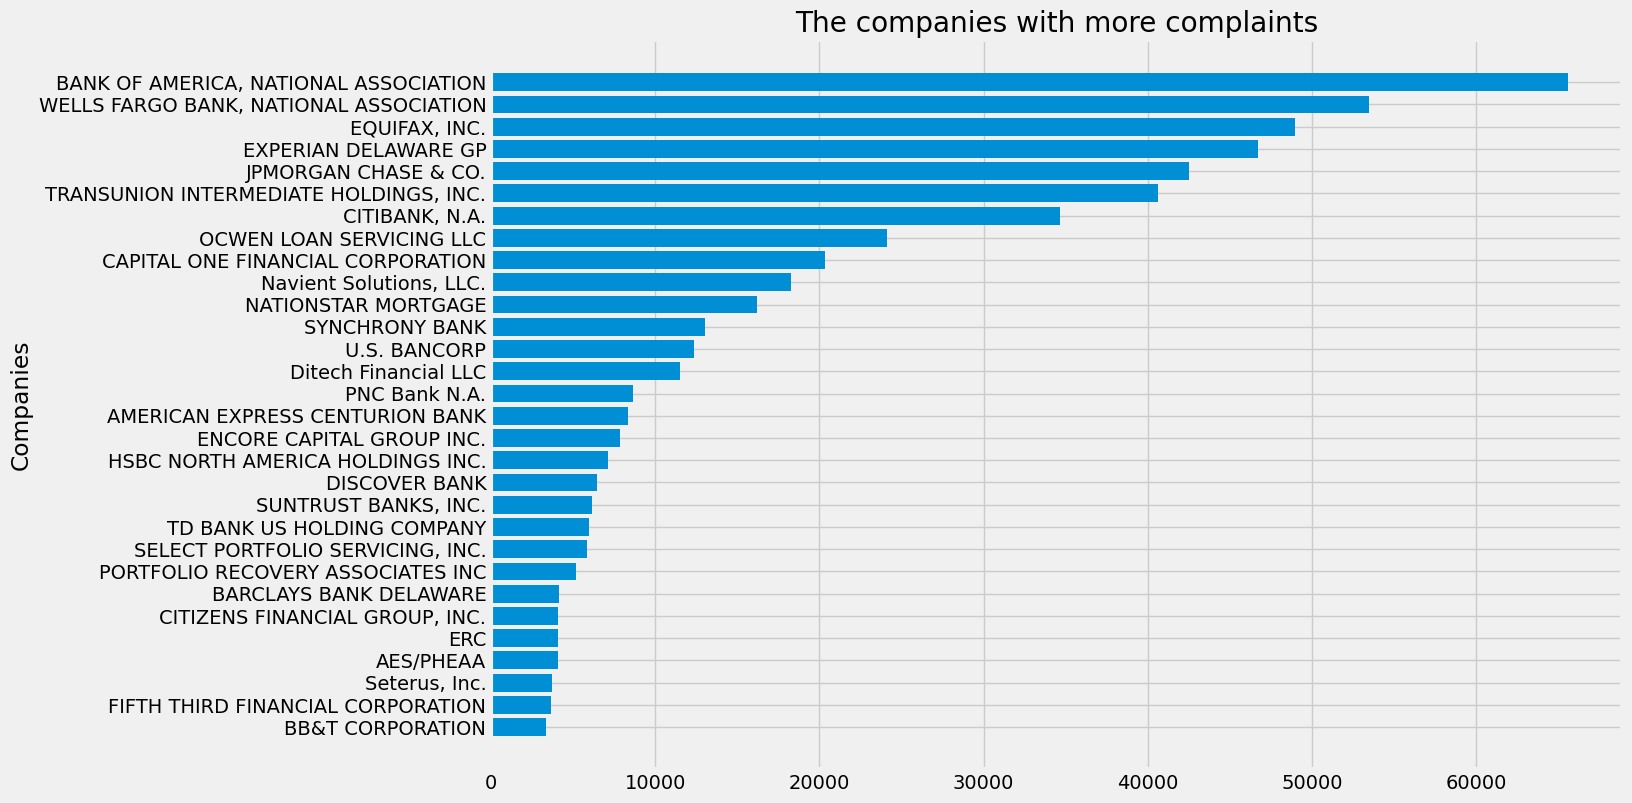

In [23]:
# To change the size of only this graph
fig= plt.figure(figsize=(13, 9))

plt.barh(companies_withmore_complaint.index,\
         companies_withmore_complaint.values )

plt.title('The companies with more complaints')
plt.ylabel("Companies")
plt.show()

In [24]:
#sns.barplot(x='Company', y='Complaint_Id', data=companies_withmore_complaint)

## How much Complaint state wise?

In [25]:
state_withmore_complaint = df.groupby('State')['Complaint_Id'].count()
#state_withmore_complaint = more_complaint.sort_values(ascending=False)

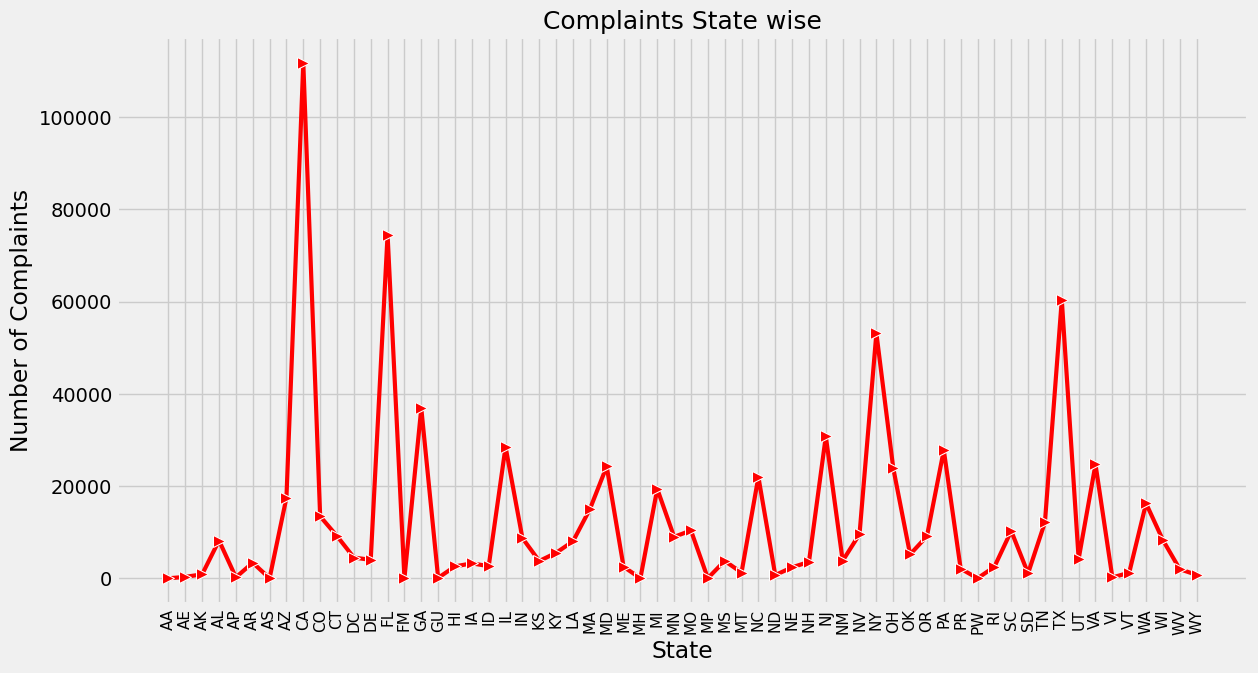

In [44]:
sns.set_palette("muted")


# to change only one graph
plt.figure(figsize=(13,7))

sns.lineplot(x=state_withmore_complaint.index, y= state_withmore_complaint.values,
             #data= state_withmore_complaint, 
             color="red", marker= '>', 
             markersize=9, linewidth=3)

plt.title('Complaints State wise', size=18)
plt.xticks(rotation=90, size=11)
plt.ylabel('Number of Complaints')
plt.show()

## The Product that people get problem about?

C:\Users\JASIM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


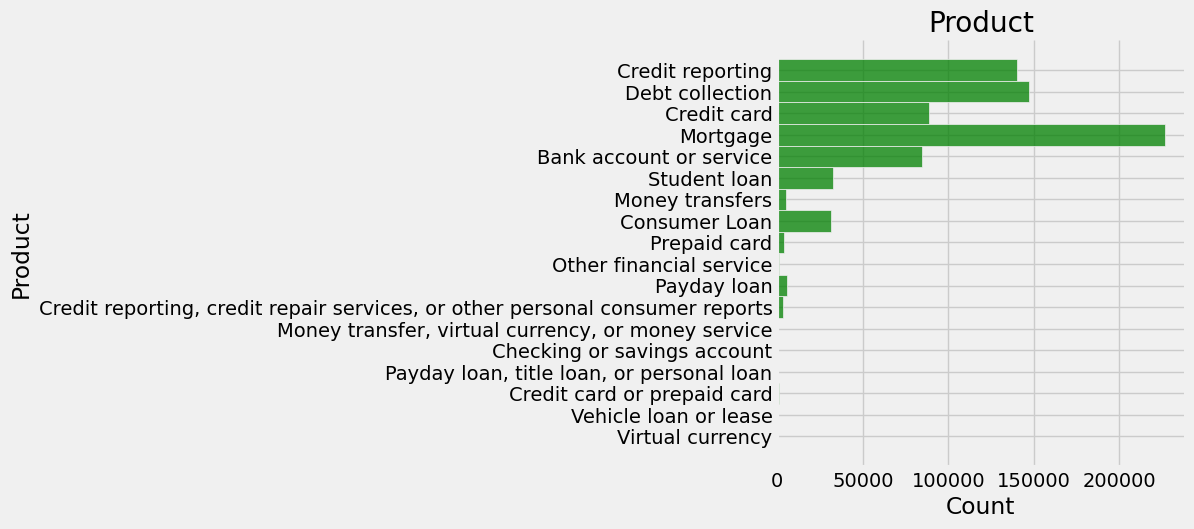

In [27]:
sns.displot(y=df['Product'], 
            color='g', 
            #log=True 
           )

plt.title('Product')
plt.show()

* Mortgage is the top product with more than 200000 
* Virtual Currency less than 50 

## Are there any patterns in the timing of consumer complaints? For example, are there any particular months or days of the week that have higher complaint rates?

In [28]:
df['Year_Received'] = df['Date_Received'].dt.year
df['Month_Received'] = df['Date_Received'].dt.month
#df['Week_Received'] = df['Date_Received'].dt.dayofweek

In [29]:
Complaint_date = df.groupby('Date_Received')['Complaint_Id'].count()
high_Complaint_date = Complaint_date.sort_values(ascending=False)#[:1000]
#high_Complaint_date.head(10)

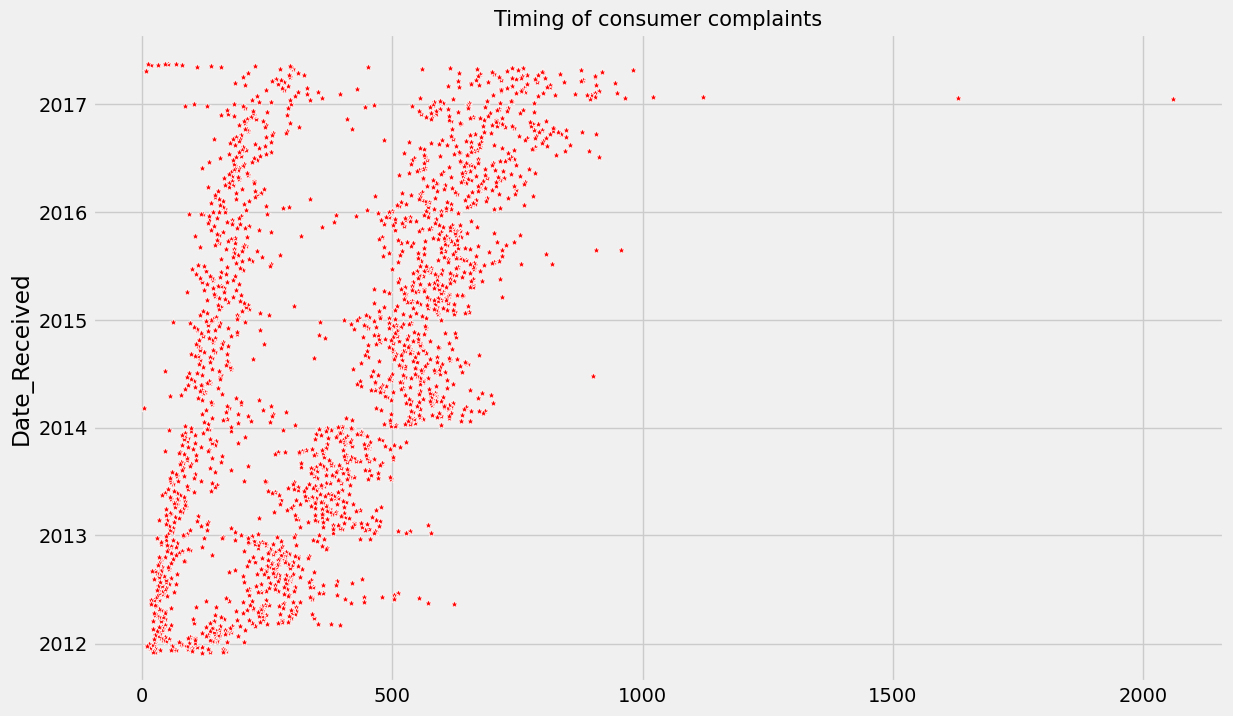

In [30]:
sns.scatterplot(x=high_Complaint_date.values, y=high_Complaint_date.index,
              marker= '*', 
                color='r', 
               )

plt.title('Timing of consumer complaints', size=15)
plt.show()

* 2017-01-19    2058
* 2017-01-20    1629
* 2017-01-24    1121
* 2017-01-26    1021
* 2017-04-26     981
* 2017-01-23     965
##### These Dates in 2017 Received most number of complaints espicially in january

## Which states have the highest and lowest number of consumer complaints?

In [1]:
sate_complaint = df.groupby('State')['Complaint_Id'].count()
top_states = sate_complaint.sort_values(ascending=False)[:15]

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

plt.bar(top_states.index, top_states.values)
plt.title('Top States with high Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')



bottom_states = sate_complaint.sort_values(ascending=True)[:15]

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

plt.bar(bottom_states.index, bottom_states.values, color='r')
plt.title('Top States with Least Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')


plt.show()

NameError: name 'df' is not defined

## The issue that companies get the most

In [32]:
most_issue_company = df.groupby('Company')\
                   ['Issue']\
                       .value_counts().sort_values(ascending=False)

most_issue_company[:10]

Company                                 Issue                                   
EQUIFAX, INC.                           Incorrect information on credit report      34345
EXPERIAN DELAWARE GP                    Incorrect information on credit report      32385
TRANSUNION INTERMEDIATE HOLDINGS, INC.  Incorrect information on credit report      30236
BANK OF AMERICA, NATIONAL ASSOCIATION   Loan modification,collection,foreclosure    24909
WELLS FARGO BANK, NATIONAL ASSOCIATION  Loan modification,collection,foreclosure    17205
OCWEN LOAN SERVICING LLC                Loan modification,collection,foreclosure    11000
JPMORGAN CHASE & CO.                    Loan modification,collection,foreclosure     9667
OCWEN LOAN SERVICING LLC                Loan servicing, payments, escrow account     9614
BANK OF AMERICA, NATIONAL ASSOCIATION   Loan servicing, payments, escrow account     9241
Navient Solutions, LLC.                 Dealing with my lender or servicer           8501
Name: Issue, dtype:

## show the differences between (Date_Received) and (Year_Received)

In [33]:

df['Year_Received'] = df['Date_Received'].dt.year
#df['Month_Received'] = df['Date_Received'].dt.month
#df['Week_Received'] = df['Date_Received'].dt.dayofweek


In [34]:

df[df['Year_Received'] == 2017]

Complaint_date = df.groupby('Year_Received')['Complaint_Id'].count()
Complaint_date


Year_Received
2011      2521
2012     71755
2013    107160
2014    152044
2015    167379
2016    190207
2017     80917
Name: Complaint_Id, dtype: int64

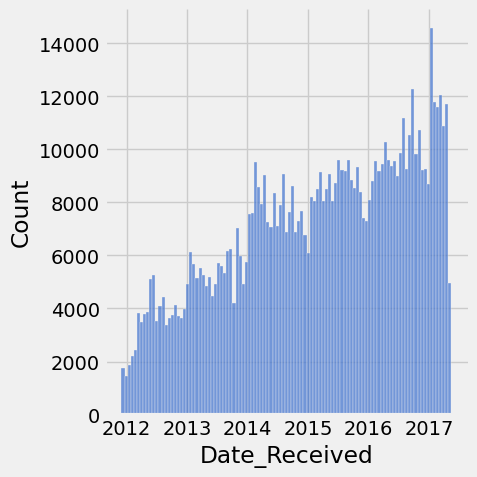

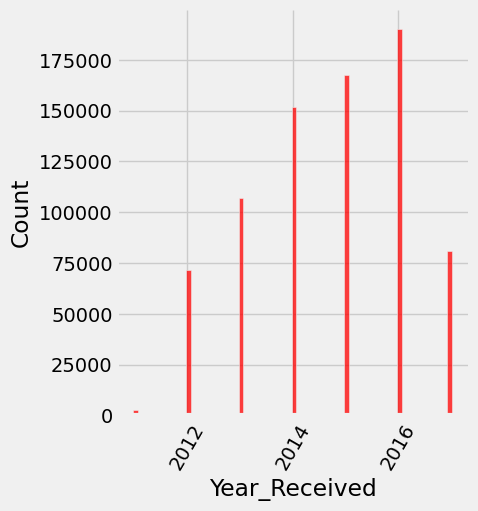

In [35]:
sns.displot(df['Date_Received'],)

sns.displot(df['Year_Received'], color='r',
           shrink=2)

plt.xticks(rotation=60)

plt.show()

* In this dataset we can see that most of Complaint has been received in 2016
* and in 2011 the lowest one 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


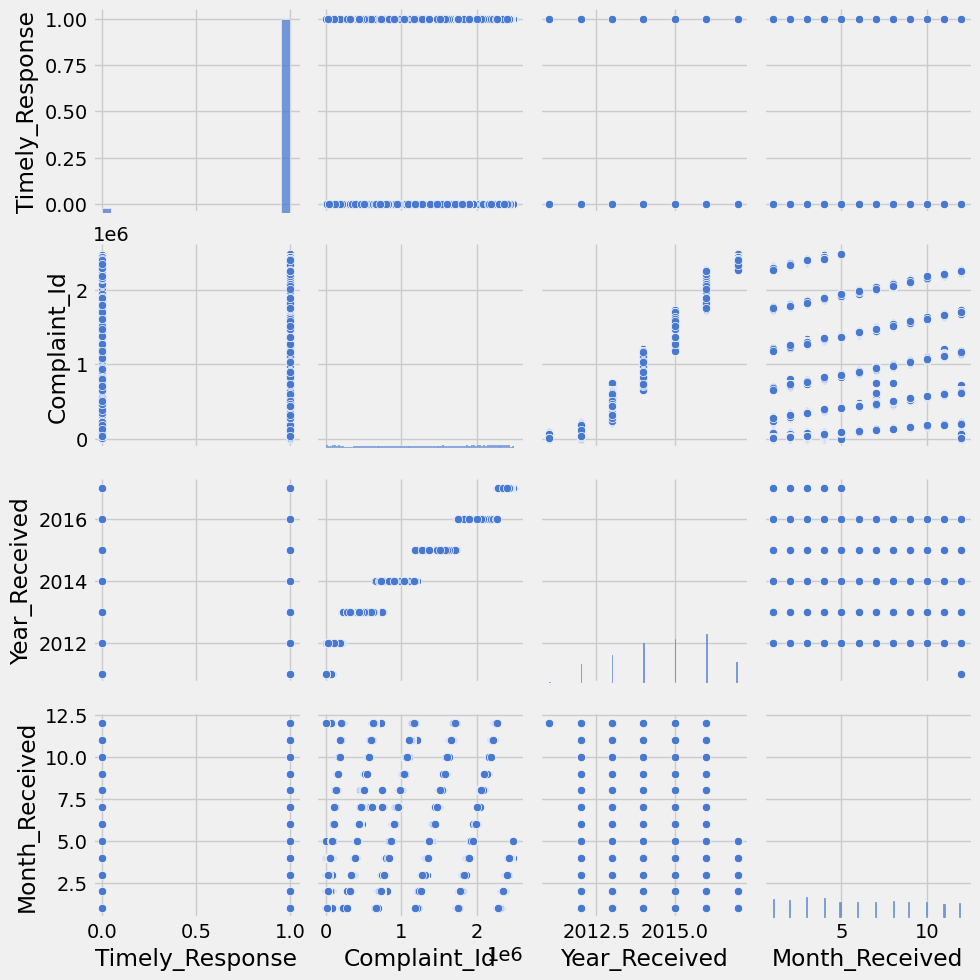

In [36]:
sns.pairplot(df)
plt.show()

# Practice

In [37]:
df.head()

Date_Received           Product                            Sub_Product  \
0    2017-03-21  Credit reporting                              Not given   
1    2017-04-19   Debt collection  Other (i.e. phone, health club, etc.)   
2    2017-04-19       Credit card                              Not given   
3    2017-04-14          Mortgage                         Other mortgage   
4    2017-04-19       Credit card                              Not given   

                                      Issue                        Company  \
0    Incorrect information on credit report           EXPERIAN DELAWARE GP   
1           Disclosure verification of debt  Security Credit Services, LLC   
2                                     Other                 CITIBANK, N.A.   
3  Loan modification,collection,foreclosure       Shellpoint Partners, LLC   
4                      Credit determination                   U.S. BANCORP   

  State Zip_Code Submitted_Via Date_Sent_To_Company  \
0    TX    77075         Phone           2017-03-21   
1    IL    60643           Web           2017-04-20   
2    IL    62025      Referral           2017-04-20   
3    CA    90305      Referral           2017-04-14   
4    LA    70571   Postal mail           2017-04-21   

      Company_Response_To_Consumer  Timely_Response Consumer_Disputed  \
0  Closed with non-monetary relief             True                No   
1          Closed with explanation             True                No   
2          Closed with explanation             True                No   
3          Closed with explanation             True                No   
4          Closed with explanation             True                No   

   Complaint_Id  Year_Received  Month_Received  
0       2397100           2017               3  
1       2441777           2017               4  
2       2441830           2017               4  
3       2436165           2017               4  
4       2441726           2017               4

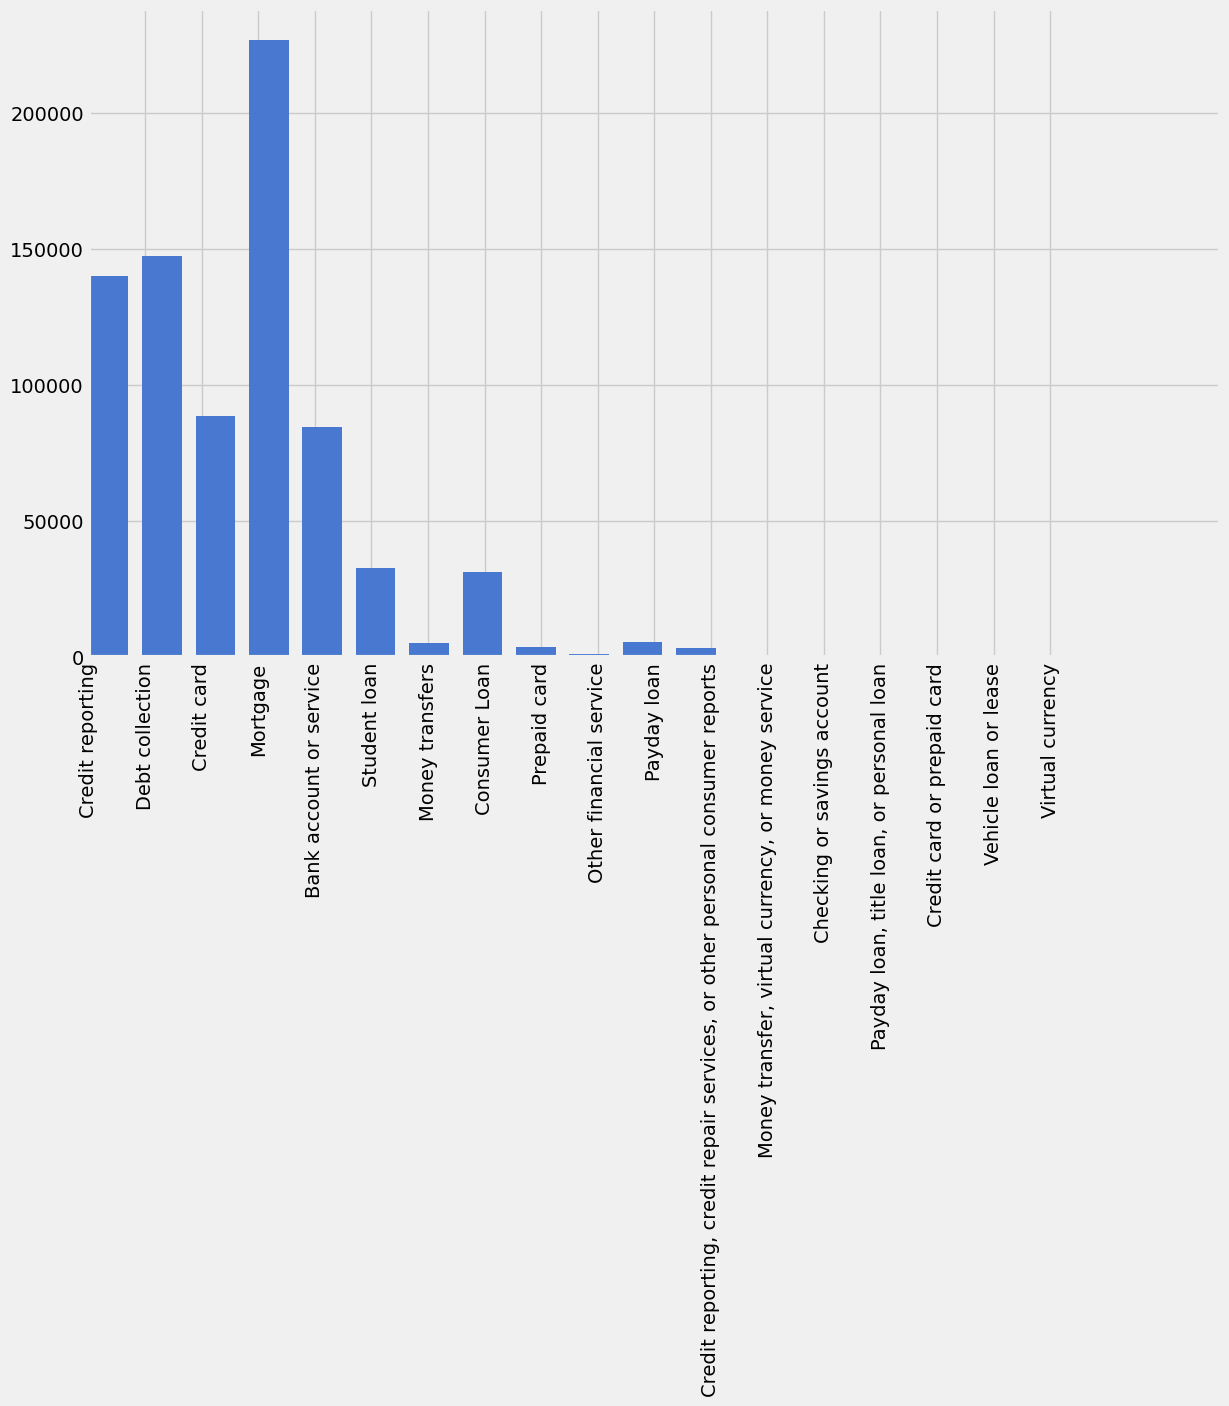

In [38]:
plt.hist(df['Product'], bins=18, width=0.7)
plt.xlim(0, 20)
plt.xticks(rotation=90)
plt.show()

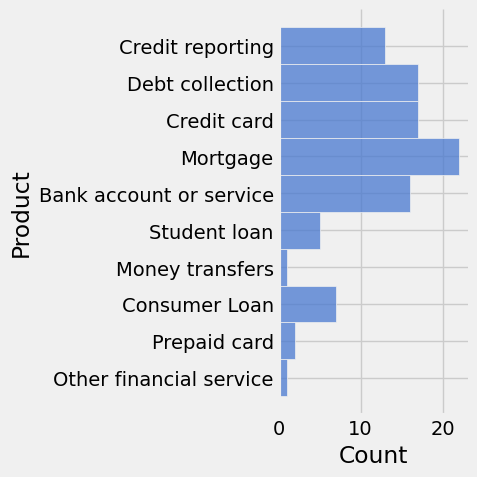

In [39]:


subset = df.loc[:100, 'Product']
sns.displot(y=subset)

plt.show()